# Load files & download

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap


%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 30.9 MB/s eta 0:00:00


In [4]:
df=pd.read_csv("/content/drive/MyDrive/yahoo_QA/train.csv",names=['class', 'title', 'content', 'answer'])

In [5]:
categories = {1: 'Society & Culture', 2: 'Science & Mathematics', 3: 'Health', 4: 'Education & Reference',
              5: 'Computers & Internet', 6: 'Sports', 7: 'Business & Finance', 8: 'Entertainment & Music',
              9: 'Family & Relationships', 10: 'Politics & Government'}

labels=['Society & Culture', 'Science & Mathematics', 'Health', 'Education & Reference',
        'Computers & Internet', 'Sports', 'Business & Finance', 'Entertainment & Music',
        'Family & Relationships', 'Politics & Government']

In [6]:
df['label'] = df['class'].map(categories)
df = df.drop('class', axis=1)

In [7]:
label_dict = dict(zip(labels, range(0,len(labels))))
df['index']=df['label'].apply(labels.index)

In [8]:
import random
#1: 'Society & Culture', 2: 'Science & Mathematics', 3: 'Health', 4: 'Education & Reference', 5: 'Computers & Internet'
# Return a list of indices
cul_idx=random.sample(list(df.query('label=="Society & Culture"').index), 500)
sci_idx=random.sample(list(df.query('label=="Science & Mathematics"').index),500)
health_idx=random.sample(list(df.query('label=="Health"').index),500)
edu_idx=random.sample(list(df.query('label=="Education & Reference"').index),500)
comp_idx=random.sample(list(df.query('label=="Computers & Internet"').index),500)

# Use indices to select data
df= df.loc[cul_idx + sci_idx + health_idx+ edu_idx + comp_idx]
index_list=cul_idx + sci_idx + health_idx+ edu_idx + comp_idx

In [9]:
from sklearn.utils import shuffle
df = shuffle(df)

In [10]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True')
  plt.xlabel('Predicted');



# zeroshot



In [11]:
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from transformers import *

def model_pipeline(model_name, df, candidate_labels):

  classifier=pipeline("zero-shot-classification",model=model_name)

  predict=[]
  true=[]
  for i in tqdm(range(0, len(df))):
    text = df.iloc[i,]['title']
    cat = df.iloc[i,]['label']
    res = classifier(text, candidate_labels, multi_label=False)
    labels = res['labels'][0]

    predict.append(labels)
    true.append(cat)

  cm = confusion_matrix(true, predict)
  df_cm = pd.DataFrame(cm, index=candidate_labels, columns=candidate_labels)
  show_confusion_matrix(df_cm)

  return(classification_report(true, predict, target_names=candidate_labels))

/usr/local/lib/python3.10/dist-packages/transformers/generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import TFGenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation_flax_utils.py:24: FutureWarning: Importing `FlaxGenerationMixin` from `src/transformers/generation_flax_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import FlaxGenerationMixin` instead.
  warnings.warn(
No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
Xformers is not insta

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--typeform--distilbert-base-uncased-mnli/snapshots/cfa538a0fddbbd978fefe8966c1aeff7ad409c90/config.json
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
Model config DistilBertConfig {
  "_name_or_path": "typeform/distilbert-base-uncased-mnli",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "finetuning_task": "mnli",
  "hidden_dim": 3072,
  "id2label": {
    "0": "ENTAILMENT",
    "1": "NEUTRAL",
    "2": "CONTRADICTION"
  },
  "initializer_range": 0.02,
  "label2id": {
    "CONTRADICTION": 2,
    "ENTAILMENT": 0,
    "NEUTRAL": 1
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0

'                       precision    recall  f1-score   support\n\n    Society & Culture       0.87      0.48      0.62       500\nScience & Mathematics       0.50      0.29      0.37       500\n               Health       0.49      0.70      0.58       500\nEducation & Reference       0.70      0.06      0.10       500\n Computers & Internet       0.33      0.78      0.46       500\n\n             accuracy                           0.46      2500\n            macro avg       0.58      0.46      0.42      2500\n         weighted avg       0.58      0.46      0.42      2500\n'

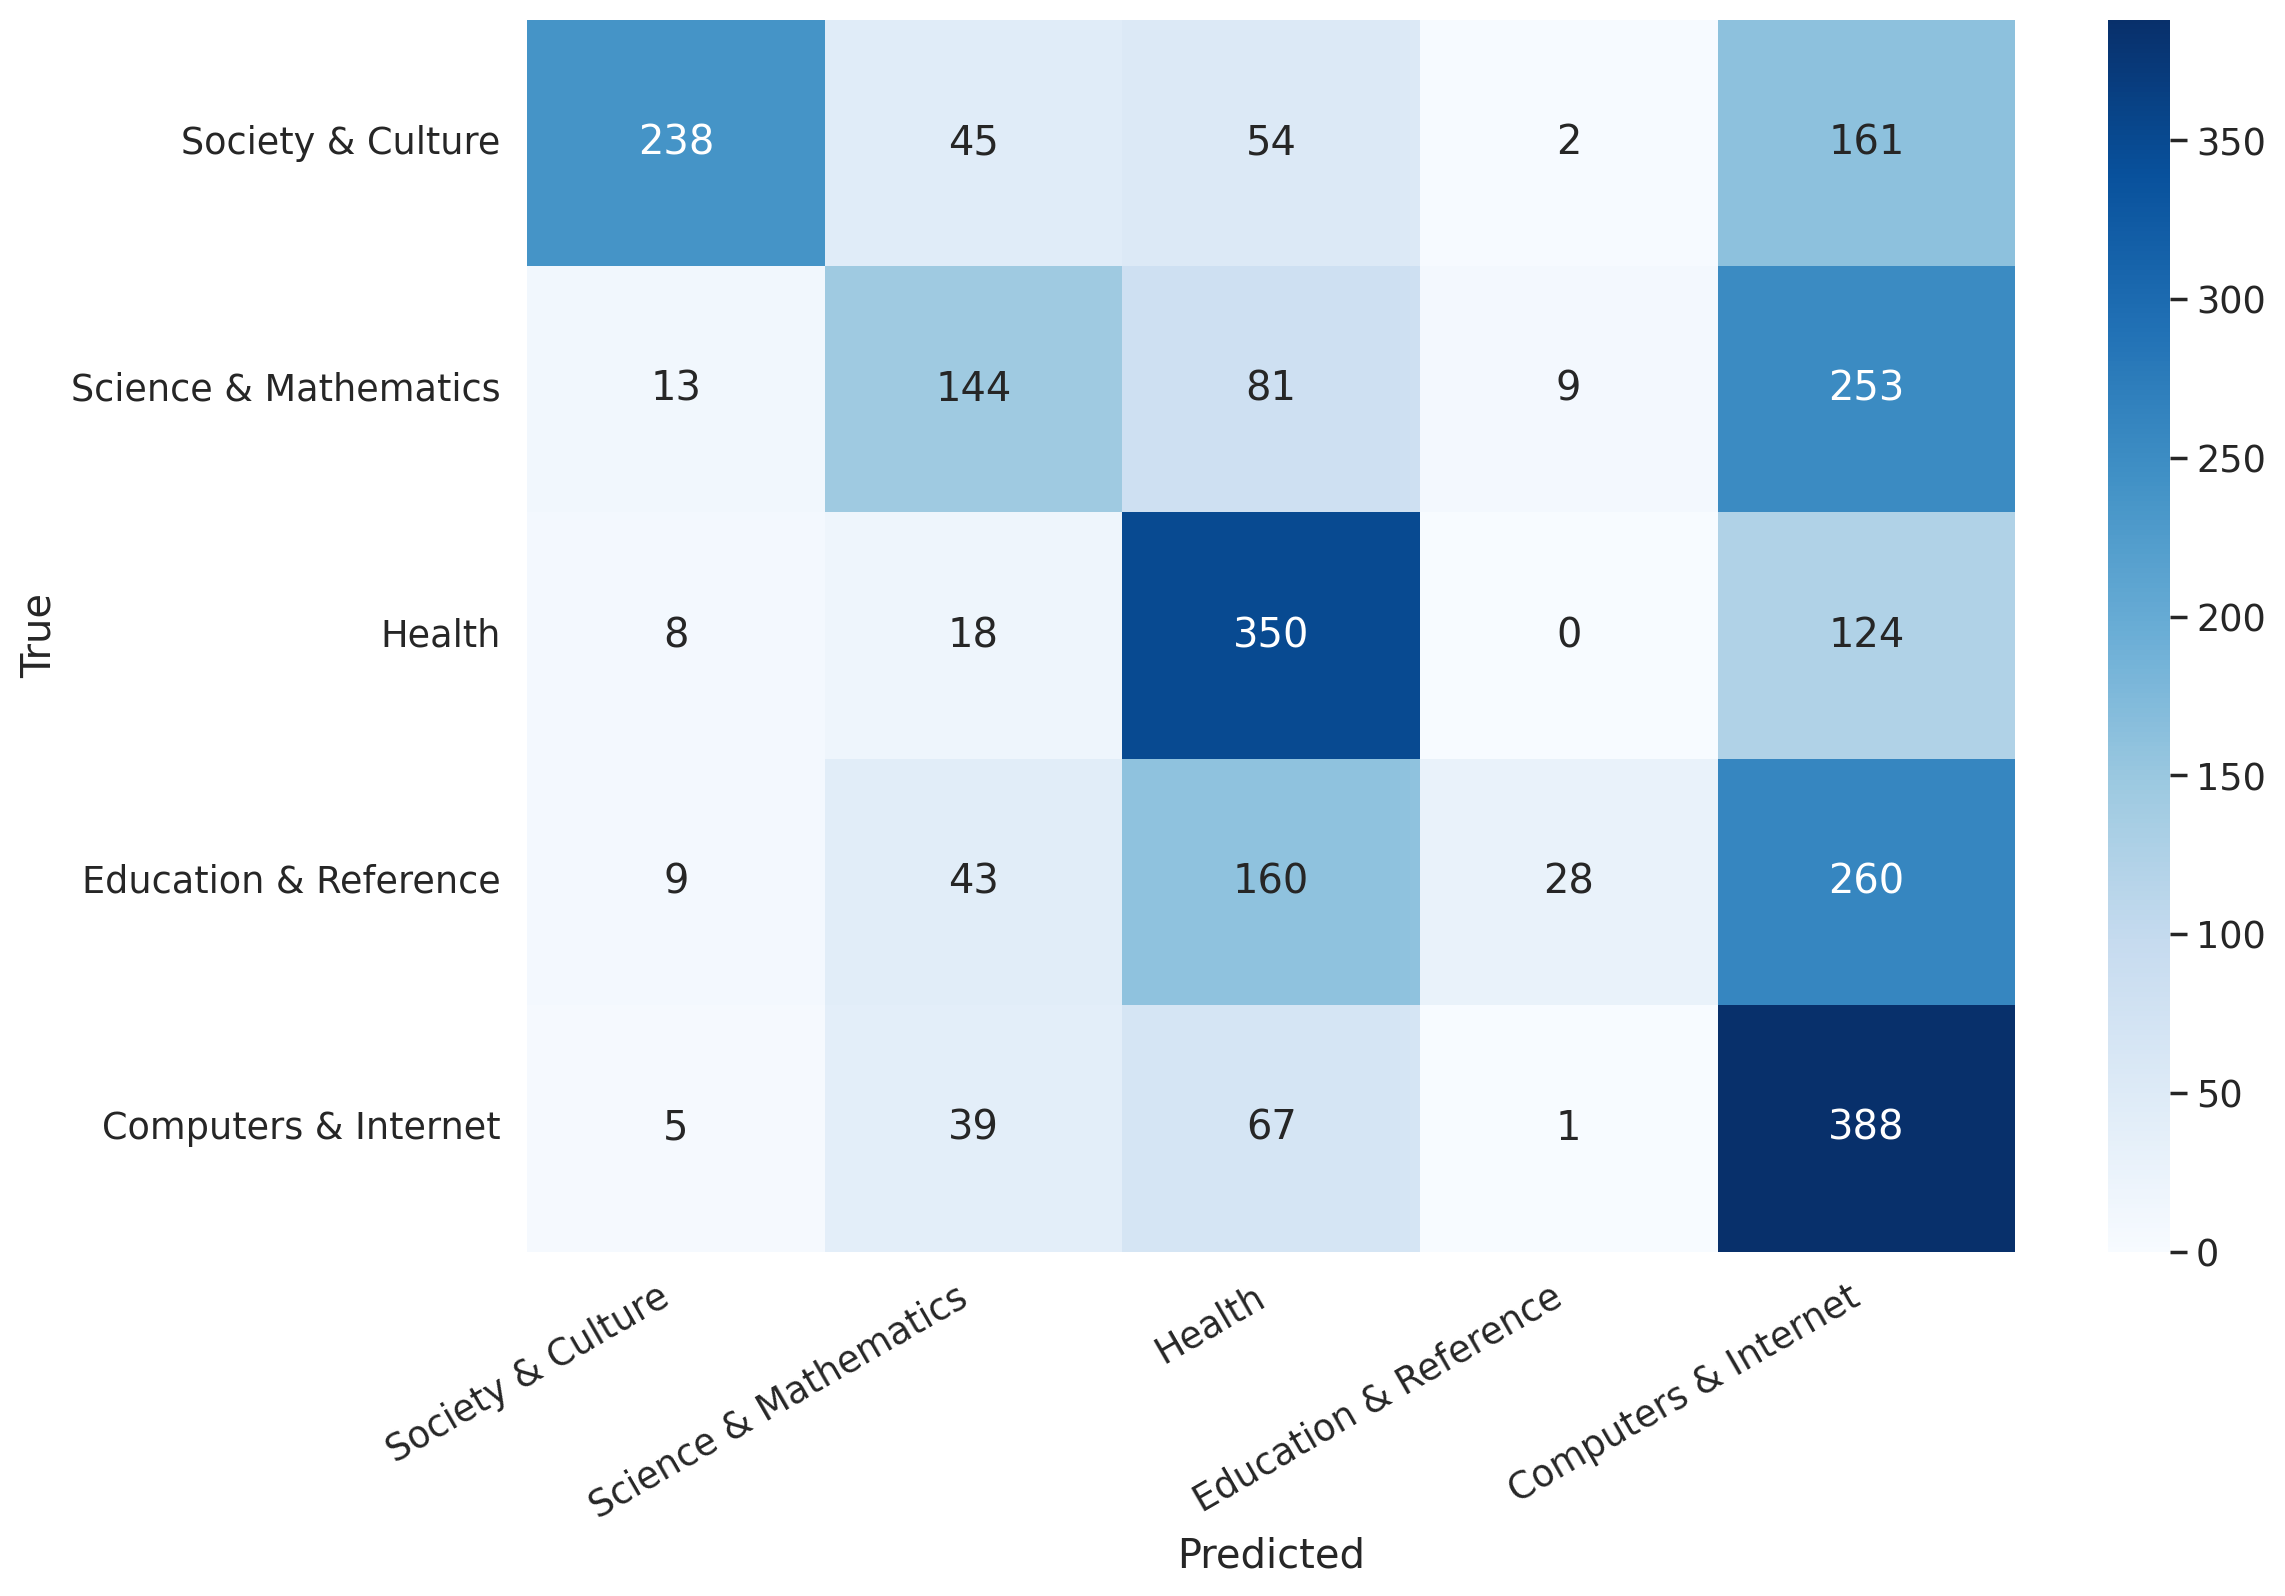

In [13]:
model_pipeline("typeform/distilbert-base-uncased-mnli", df, labels[0:5])